# 🚢 Titanic Survival Prediction

This project predicts survival on the Titanic dataset using Decision Tree and Logistic Regression. It includes data cleaning, visualization, feature selection, model training, and evaluation.

# 1. Load and Inspect Data

**DATA COLLECTION**

# 2. Data Preprocessing

- Dropping irrelevant columns
- Handling missing values
- Encoding categorical variables

In [121]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


**LOADING DATA**

In [122]:
#Load the training data
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")

#print first 5 rows
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [123]:
#Load the test data
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")

#print first 5 rows
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


**INSPECT DATA**

In [124]:
#Explore survival rates by gender

#Rate of women survived
women = train_data.loc[train_data.Sex == 'female'] ["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:- ", rate_women)

#Rate of men survived
men = train_data.loc[train_data.Sex == 'male'] ["Survived"]
rate_men = sum(men)/len(men)

print("% of men survived:-", rate_men)

% of women who survived:-  0.7420382165605095
% of men survived:- 0.18890814558058924


**MODEL SELECTION**

TRAINING DATA

In [125]:
#Machine Learning Model:- Random Forest Model
from sklearn.ensemble import RandomForestClassifier

y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]

#convert categorical variables into one-hot encoding using get_dummies()
X = pd.get_dummies(train_data[features])
X_test =  pd.get_dummies(test_data[features])

#Create the model
model = RandomForestClassifier(n_estimators = 100, max_depth = 5, random_state = 1)

#fit the model
model.fit(X,y)

#predict the model:- generate predictions from the trained model
#based on the new input data.
predictions = model.predict(X_test)

#Create the Output file
output = pd.DataFrame({'PassengerId' : test_data.PassengerId, 'Survived' : predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


# 3. Model Training: Decision Tree

**Logistic Regression Model**

**Step 1 : Import Required Libraries**

In [126]:
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

**Step 2 : Load the Dataset**

In [127]:
# Load train dataset (usually 'train.csv' from Kaggle Titanic)
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 4. Cross-Validation

**Step 3: Basic EDA and Preprocessing**

In [128]:
#Check for null values:
train_data.isnull().sum()

#Handle missing values:
# Fill Age with median
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].median())

# Fill Embarked with mode
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0])

# Drop Cabin (too many missing values)#
#train_data.drop['Cabin']
if 'Cabin' in train_data.columns:
    train_data.drop('Cabin', axis=1, inplace=True)

print(train_data.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')


# 5. Feature Importance

**Step 4: Convert Categorical to Numerical**

In [129]:
train_data.columns = train_data.columns.str.strip()  # remove spaces
train_data.columns = train_data.columns.str.lower()  # convert to lowercase
print(train_data.columns)

# Convert Sex and Embarked to numbers using Label Encoding or pd.get_dummies

# Using Label Encoding
le = LabelEncoder()
train_data['sex'] = le.fit_transform(train_data['sex'])  # male=1, female=0
train_data['embarked'] = le.fit_transform(train_data['embarked'])


Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'embarked'],
      dtype='object')


**Step 5: Select Features and Target**

In [130]:
# Select features (independent variables)
features = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']
X = train_data[features]

# Target variable (dependent)
y = train_data['survived']


 **Step 6: Split the Data**

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Step 7: Train Logistic Regression Model**

In [132]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

**Step 8: Predict and Evaluate**

In [133]:
y_pred = model.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8100558659217877
Confusion Matrix:
 [[90 15]
 [19 55]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



**Optional: Check Feature Importance**

In [134]:
coeff_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
})
print(coeff_df.sort_values(by='Coefficient', ascending=False))

    Feature  Coefficient
5      fare     0.002562
2       age    -0.030408
4     parch    -0.112478
6  embarked    -0.212666
3     sibsp    -0.294602
0    pclass    -0.931174
1       sex    -2.598461


**Decision Tree Model**

In [135]:
# Required libraries
from sklearn.tree import DecisionTreeClassifier
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7821229050279329
Confusion Matrix:
 [[83 22]
 [17 57]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.79      0.81       105
           1       0.72      0.77      0.75        74

    accuracy                           0.78       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.78      0.78       179



**Visualize the Decision Tree**

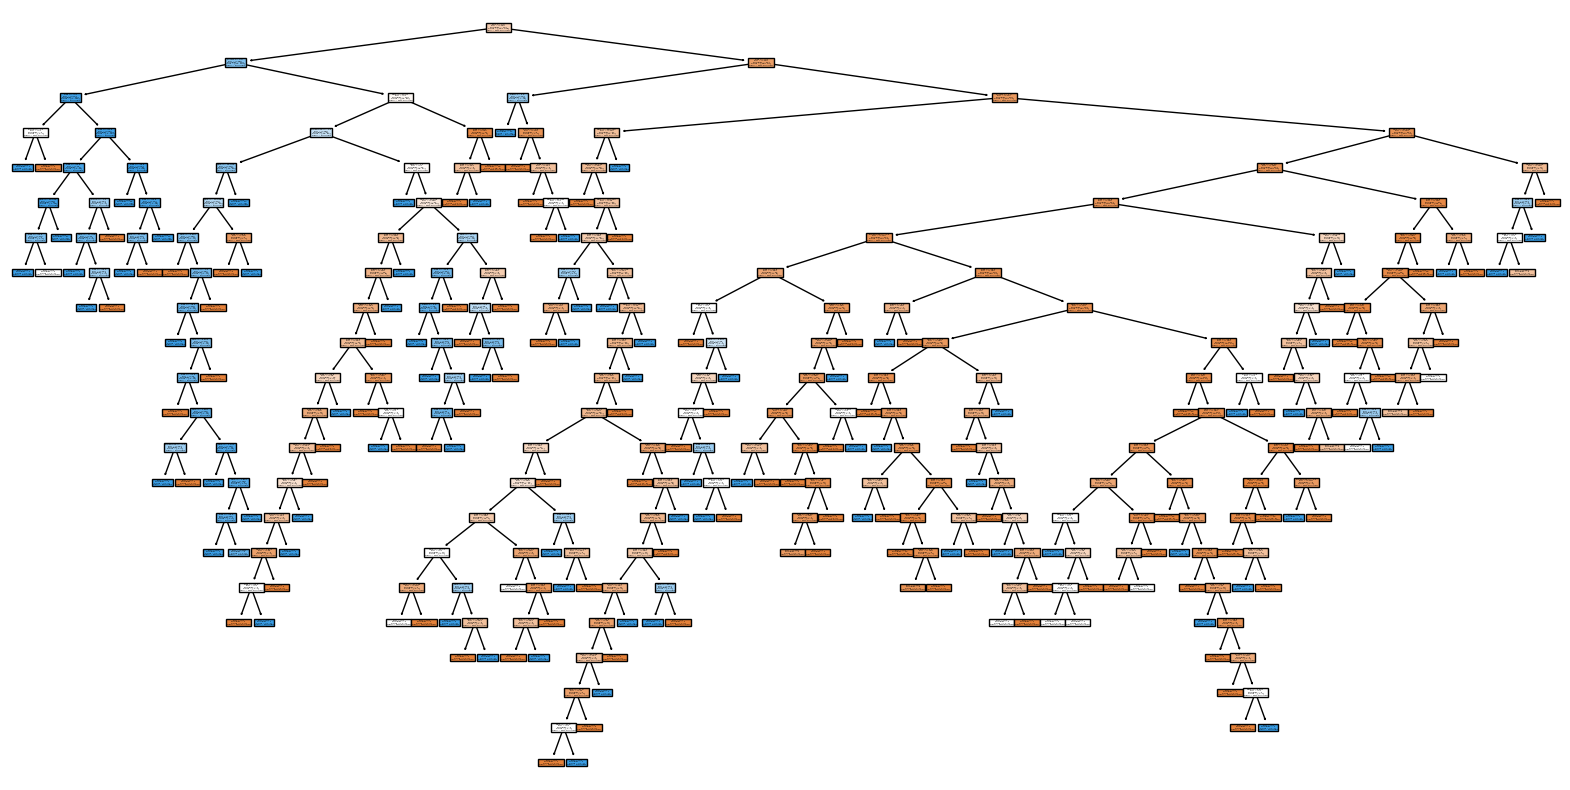

In [136]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=features, class_names=["Not Survived", "Survived"], filled=True)
plt.show()

**Steps to Perform Cross-Validation with Decision Tree**

In [138]:
import numpy as np
from sklearn.model_selection import cross_val_score

# Define model
clf = DecisionTreeClassifier(random_state=42)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')  # You can change cv=10 for 10-fold

# Display scores
print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", np.mean(cv_scores))
print("Standard deviation:", np.std(cv_scores))


Cross-validation scores: [0.74860335 0.79213483 0.80898876 0.73595506 0.81460674]
Mean accuracy: 0.7800577490427468
Standard deviation: 0.03197160942944381


**What This Does:**

cv=5: Splits your dataset into 5 parts, trains on 4, tests on 1, and repeats 5 times.

cross_val_score(): Returns accuracy scores for each fold.

Mean & Std Dev: Help you understand average performance and variation.

**1. Plot Feature Importance (Decision Tree)**

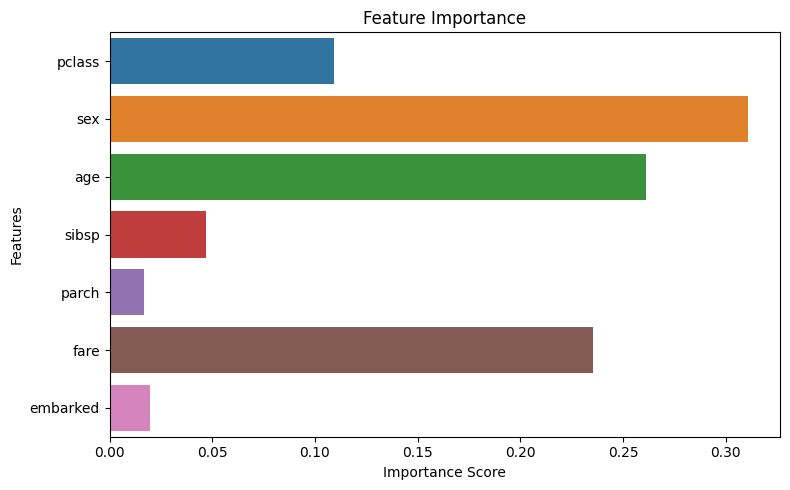

In [139]:
import matplotlib.pyplot as plt
import seaborn as sns

# Train model (if not already trained)
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X, y)

# Get feature importance
importances = clf.feature_importances_
feature_names = X.columns

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=feature_names)
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

# 6. Correlation Matrix


**2. Visualize Correlation Matrix (Heatmap)**

The correlation matrix helps you understand relationships between numeric features.

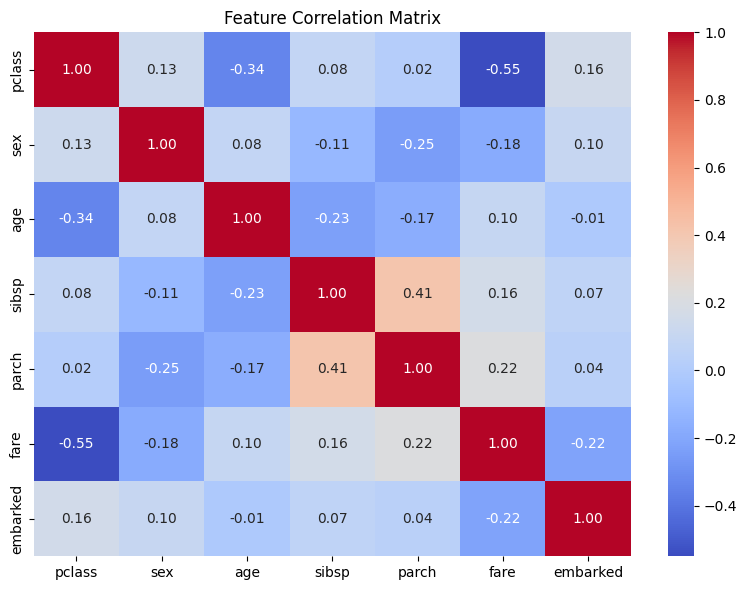

In [140]:
# Compute correlation matrix
corr_matrix = X.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

**Insights:**

Feature importance shows what the model thinks is most helpful.

Correlation matrix shows if any features are strongly correlated (which may affect some models like logistic regression).

# Conclusion
- Decision Tree performed well with cross-validated accuracy around 78–80%.
- Most important features: `Sex`, `Fare`, `Pclass`
- Data preprocessing (handling nulls and encoding) was key to good performance.